<a href="https://colab.research.google.com/github/Shubham0Rajput/Image-Difference-with-OpenCV/blob/master/Image-Difference_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

SSIM: 0.9559632629511304


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  # This is added back by InteractiveShellApp.init_path()


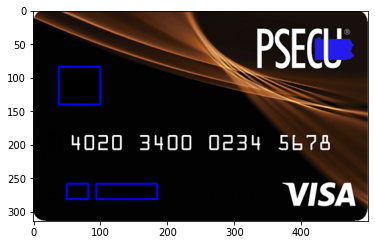

In [3]:
# load the two input images
imageA = cv2.imread('/content/drive/My Drive/m1.png')
imageB = cv2.imread('/content/drive/My Drive/o1.png')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
plt.imshow(imageA,cmap='gray')          #cv2.imshow("Original", imageA)



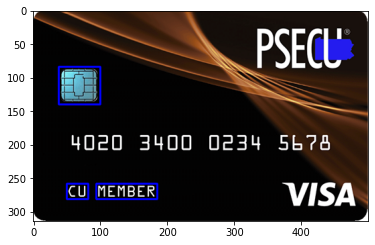

In [4]:
plt.imshow(imageB,cmap='gray')          #cv2.imshow("Modified", imageB)


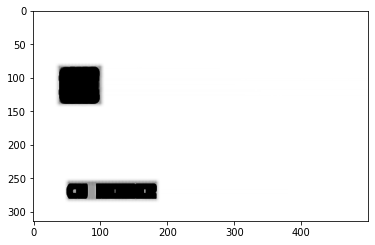

In [5]:
plt.imshow(diff,cmap='gray')            #cv2.imshow("Diff", diff)


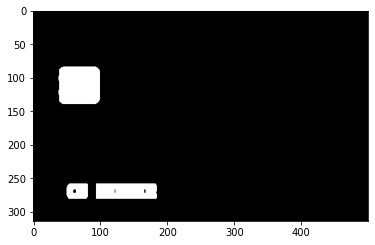

In [6]:
plt.imshow(thresh,cmap='gray')          #cv2.imshow("Thresh", thresh)